In [87]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [88]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [90]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [91]:
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [92]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [93]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [96]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [97]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [98]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

latest_date

'2017-08-23'

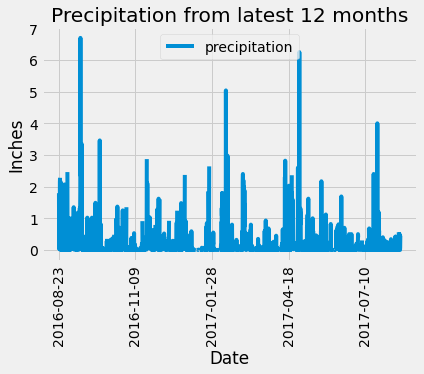

In [99]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

year_ago

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

results

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns = {'date', 'precipitation'}).set_index('date')




# Sort the dataframe by date

df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(kind="line", y="precipitation", xlabel="Date", ylabel="Inches", grid=True,
              title="Precipitation from latest 12 months", rot=90)
plt.show()



In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [101]:
# Design a query to calculate the total number stations in the dataset

total_stations = len(session.query(Station.station).all())

total_stations

9

In [102]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==most_active[0][0]).all()

results

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

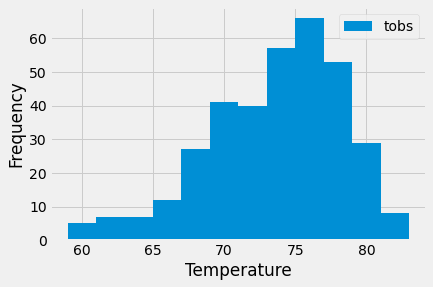

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station==most_active[0][0]).filter(Measurement.date >= year_ago).all()

df = pd.DataFrame(results, columns = {'date', 'tobs'}).set_index('date')

df.plot.hist(bins=12)

plt.xlabel("Temperature")

# Close session

In [105]:
# Close Session
session.close()